# Exploratory Data Analysis

**Imported libraries**

In [225]:
import pandas as pd
import numpy as np
import random

### Tic Tac Toe Dataset
- Importing datasets from URL
- Modifying header names

In [202]:
# Dataset from the UCI website
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data'

# Creating the headers for the columns in the dataset
name_cols = ["top-left-square", "top-middle-square", "top-right-square",
             "middle-left-square", "middle-middle-square", "middle-right-square",
             "bottom-left-square", "bottom-middle-square", "bottom-right-square",
             "Class" ]

# Creating the initial dataframe
df = pd.read_csv(url, names=name_cols)

# Viewing a sample of the file
df.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


### Auto MPG Dataset
- Importing data from local file
- Basic data cleaning where data imported in as only one column
- Pandas works as a class object, you can call several methods

In [203]:
# Locally saved file
path = "data/auto-mpg.data"

# Fresh dataframe creation
d = {"mpg": [], "cylinders": [], "displacement": [],
     "horsepower": [], "weight": [], "acceleration": [],
     "model year": [], "origin": [], "car name": []}
df = pd.DataFrame(data=d)

# Importing broken dataframe
df_import = pd.read_csv(path, header=None)

# Looping through rows and making data presentable
for i, row in df_import.iterrows():
    row_list = df_import.loc[i][0].split()
    row_list[8:] = [' '.join(row_list[8:])]
    row_list[8] = row_list[8][1:-1]
    df.loc[len(df.index)] = row_list


**DataFrame Methods**

In [204]:
# Shows rows and columns of the data
df.shape

(398, 9)

In [205]:
# Shows sample of the data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.,10.5,70,1,ford torino


In [206]:
# Shows a breif description values can be further modified
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398,398,398,398,398,398,398,398,398
unique,129,5,82,94,351,96,13,3,305
top,13.0,4,97.00,150.0,1985.,14.5,73,1,ford pinto
freq,20,204,21,22,4,23,40,249,6


In [207]:
# Displays number of rows, columns, and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null object
cylinders       398 non-null object
displacement    398 non-null object
horsepower      398 non-null object
weight          398 non-null object
acceleration    398 non-null object
model year      398 non-null object
origin          398 non-null object
car name        398 non-null object
dtypes: object(9)
memory usage: 31.1+ KB


**Row Specific Methods**

In [208]:
# Returns a list of column nams in the dataframe
df.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [209]:
# Can target a specific column of a dataframe. Returns a Series object
mpg_series = df["mpg"]
print(type(mpg_series))
mpg_series

<class 'pandas.core.series.Series'>


0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: object

In [210]:
# Returns unique values and number of occurences
df["mpg"].value_counts()

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
43.4     1
21.1     1
31.8     1
19.8     1
32.2     1
Name: mpg, Length: 129, dtype: int64

In [211]:
# Will return a sorted dataframe by specified column. In this case alphabetical order by car name
df.sort_values(by='car name')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
96,13.0,8,360.0,175.0,3821.,11.0,73,1,amc ambassador brougham
9,15.0,8,390.0,190.0,3850.,8.5,70,1,amc ambassador dpl
66,17.0,8,304.0,150.0,3672.,11.5,72,1,amc ambassador sst
315,24.3,4,151.0,90.00,3003.,20.1,80,1,amc concord
257,19.4,6,232.0,90.00,3210.,17.2,78,1,amc concord
...,...,...,...,...,...,...,...,...,...
394,44.0,4,97.00,52.00,2130.,24.6,82,2,vw pickup
309,41.5,4,98.00,76.00,2144.,14.7,80,2,vw rabbit
197,29.0,4,90.00,70.00,1937.,14.2,76,2,vw rabbit
325,44.3,4,90.00,48.00,2085.,21.7,80,2,vw rabbit c (diesel)


In [212]:
# Drops specified rows and columns
df.drop(columns='weight')

,mpg,cylinders,displacement,horsepower,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,15.6,82,1,ford mustang gl
394,44.0,4,97.00,52.00,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,18.6,82,1,ford ranger


**Methods dealing with missing values**

In [213]:
# Creating a NoneType in the dataset
df['mpg'][0] = None
# Returning a sum of null values in each column
df.isnull().sum()

mpg             1
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [214]:
# Fills null values in a variety of ways
df.fillna('test')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,test,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.,15.6,82,1,ford mustang gl
394,44.0,4,97.00,52.00,2130.,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.,18.6,82,1,ford ranger


In [215]:
# Drops null values in this case the entire row of the chevy malibu
df.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
1,15.0,8,350.0,165.0,3693.,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.,15.6,82,1,ford mustang gl
394,44.0,4,97.00,52.00,2130.,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.,18.6,82,1,ford ranger


### Using Basic Methods with M&M Dataset
- Value counts
- Basic statistics

In [216]:
# M&M data url
url_mms = 'https://tinyurl.com/mms-statistics'

# Creating dataframe
df = pd.read_csv(url_mms)

# Print sample
print(df.head())
print('')

# Finding value counts of M&M types
print(df['type'].value_counts())
print('')

# Basic statistics
print(df.describe())

            type   color  diameter  mass
0  peanut butter    blue     16.20  2.18
1  peanut butter   brown     16.50  2.01
2  peanut butter  orange     15.48  1.78
3  peanut butter   brown     16.32  1.98
4  peanut butter  yellow     15.59  1.62

plain            462
peanut butter    201
peanut           153
Name: type, dtype: int64

         diameter        mass
count  816.000000  816.000000
mean    14.171912    1.419632
std      1.220001    0.714765
min     11.230000    0.720000
25%     13.220000    0.860000
50%     13.600000    0.920000
75%     15.300000    1.930000
max     17.880000    3.620000


### Plotting Data

**Line Plot**

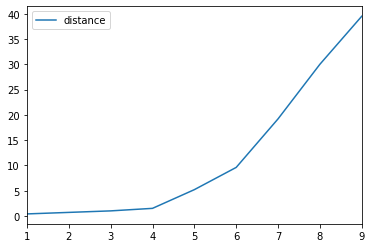

In [236]:
# Creating a dataframe
df = pd.DataFrame({'planets': ['Mercury', 'Venus', 'Earth',
                               'Mars', 'Jupitor', 'Saturn',
                               'Uranus', 'Neptune', 'Pluto'],
                    'distance': [0.4, 0.7, 1, 1.5, 5.2, 9.6, 19.2, 30, 39.5]
                    }, index=[1, 2, 3, 4, 5, 6, 7, 8, 9])

# Plotting dataframe
df.plot.line();

**Histogram**

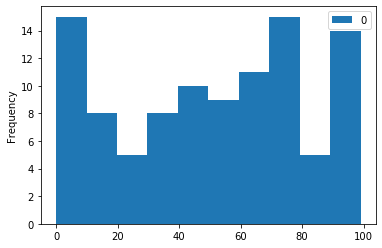

In [235]:
# Creating a dataframe with randomized data using numpy
df = pd.DataFrame(np.random.randint(0,100,size=(100, 1)))

# Plotting histogram with 10 bins
df.plot.hist(bins=10);

**Scatter Plot**

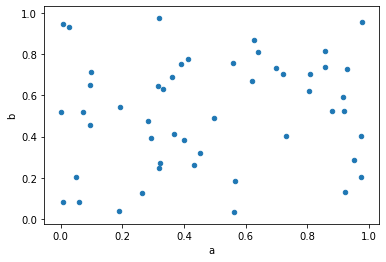

In [234]:
# Creating dataframe from random numbers
df = pd.DataFrame(np.random.rand(50, 2), columns=['a', 'b'])

# Creating scatter plot
df.plot.scatter(x='a', y='b');

**Density Plot**

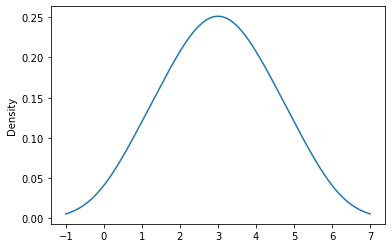

In [233]:
# Create a pandas Series
numbers = pd.Series([1, 2, 2.5, 3, 3.5, 4, 5])

# Plot the KDE
numbers.plot.kde();

### Plotting with Auto MPG Dataset

In [304]:
# Locally saved file
path = "data/auto-mpg.data"

# Fresh dataframe creation
d = {"mpg": [], "cylinders": [], "displacement": [],
     "horsepower": [], "weight": [], "acceleration": [],
     "model year": [], "origin": [], "car name": []}
df = pd.DataFrame(data=d)

# Importing broken dataframe
df_import = pd.read_csv(path, header=None)

# Looping through rows and making data presentable
for i, row in df_import.iterrows():
    row_list = df_import.loc[i][0].split()
    row_list[8:] = [' '.join(row_list[8:])]
    row_list[8] = row_list[8][1:-1]
    df.loc[len(df.index)] = row_list

# None values are saved as ? removing all rows with ?
for col in df.columns:
    df = df[df[col] != '?']

# Converting numberic columns from strings to numbers
for col in df.columns[0:8]:
    df[col] = df[col].astype(str).astype(float)

print(df.dtypes)
print('')
df.head()

mpg             float64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year      float64
origin          float64
car name         object
dtype: object



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


**Line Plot with Auto MPG Dataset**
- Miles per gallon verses weight of car

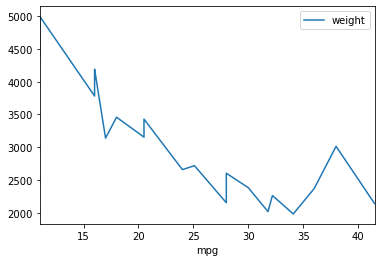

In [325]:
# Taking a random sample from dataframe for visual purposes
df_sample = df.sample(n=20, random_state=1)

# Sorting the dataframe on measured values
df_sample = df_sample.sort_values(['mpg', 'weight'], ascending = (True, True))

# Plotting sample dataframe
df_sample.plot.line(x='mpg', y='weight');

**Histagram with Auto MPG Dataset**
- analysing car weight

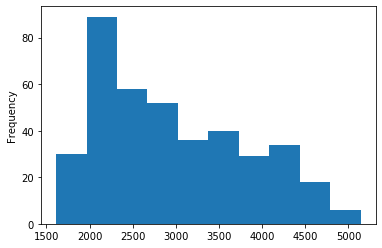

In [326]:
# Plotting histagram
df['weight'].plot.hist(bins=10);

### Plotting with M&M Dataset

In [339]:
# M&M data url
url_mms = 'https://tinyurl.com/mms-statistics'

# Creating dataframe
df = pd.read_csv(url_mms)

df.head()

,type,color,diameter,mass
0,peanut butter,blue,16.20,2.18
1,peanut butter,brown,16.50,2.01
2,peanut butter,orange,15.48,1.78
3,peanut butter,brown,16.32,1.98
4,peanut butter,yellow,15.59,1.62


**Density Plotting with M&M Dataset**

In [340]:
df['type'].value_counts()

plain            462
peanut butter    201
peanut           153
Name: type, dtype: int64

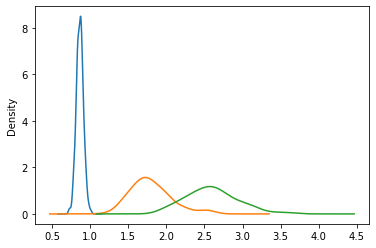

In [341]:
# Creating dataframe subsets
df_plain = df[df.type == 'plain']
df_peanut_butter = df[df.type == 'peanut butter']
df_peanut = df[df.type == 'peanut']

# Plotting weight densities of M&M types based on mass
df_plain['mass'].plot.kde();
df_peanut_butter['mass'].plot.kde();
df_peanut['mass'].plot.kde();

**Scatter plot with M&M dataset**

In [346]:
# Finding max and min
df.describe()

,diameter,mass
count,816.000000,816.000000
mean,14.171912,1.419632
std,1.220001,0.714765
min,11.230000,0.720000
25%,13.220000,0.860000
50%,13.600000,0.920000
75%,15.300000,1.930000
max,17.880000,3.620000


Chart One: M&M Type: Plain
Chart two: M&M Type: Peanut Butter
Chart Three: M&M Type: Peanut


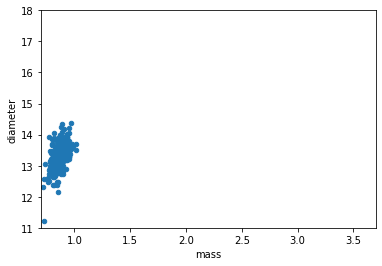

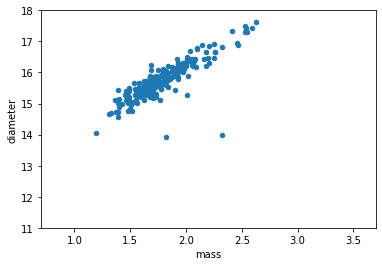

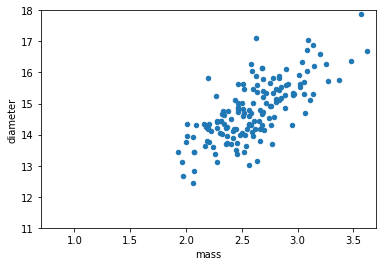

In [355]:
# Scatter plotting m&m type vs diameter

# Showing the diffrent scattering between M&M types
print("Chart One: M&M Type: Plain")
df_plain.plot.scatter(x='mass', y='diameter', xlim=(0.7, 3.7), ylim=(11.0, 18.0));
print("Chart two: M&M Type: Peanut Butter")
df_peanut_butter.plot.scatter(x='mass', y='diameter', xlim=(0.7, 3.7), ylim=(11.0, 18.0));
print("Chart Three: M&M Type: Peanut")
df_peanut.plot.scatter(x='mass', y='diameter', xlim=(0.7, 3.7), ylim=(11.0, 18.0));